In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load the Titanic dataset.


In [ ]:
import pandas as pd
df=pd.read_excel('titanic3.xlsx')


2. Create a bar plot to visualize the survival rate based on Passenger Class.



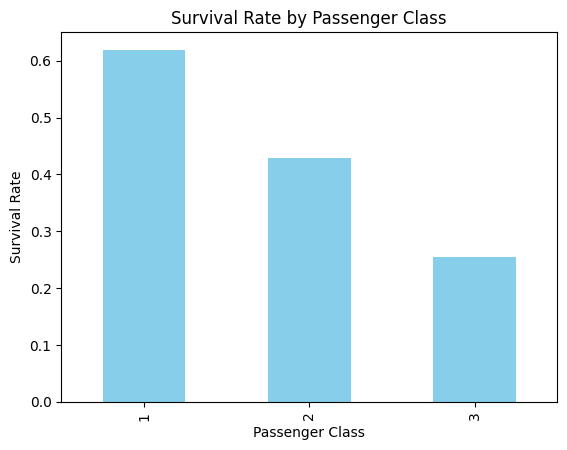

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for survival rate by passenger class
survival_rate = df.groupby('pclass')['survived'].mean()
survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


3. Create a pairplot to visualize the relationships between the following variables: age, fare, class, and survived.



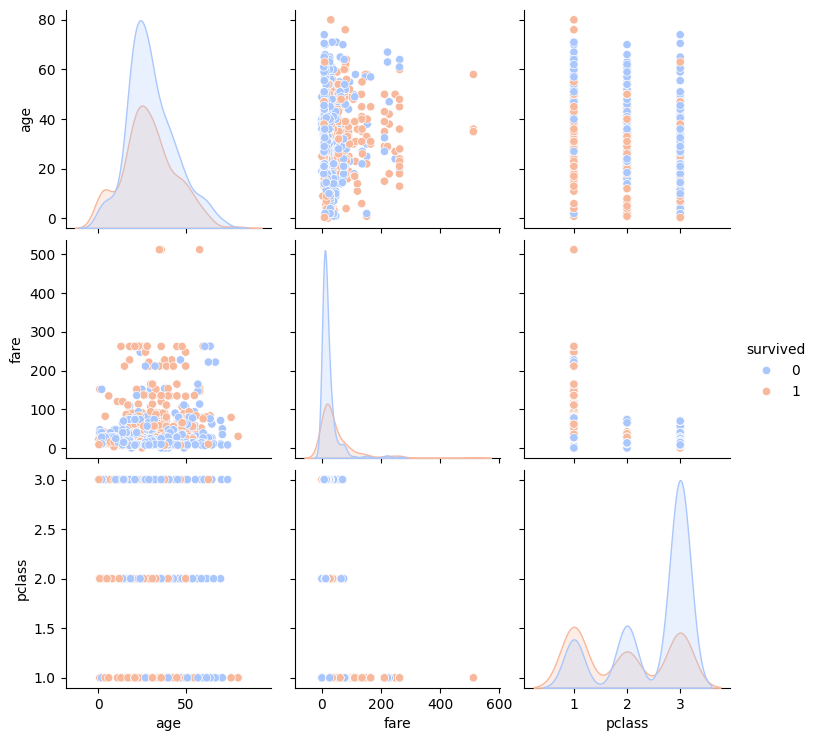

In [ ]:
import seaborn as sns

# Pairplot for selected variables
sns.pairplot(df, vars=['age', 'fare', 'pclass'], hue='survived', palette='coolwarm')
plt.show()


4. Create a histogram to visualize the distribution of ages among Titanic passengers.



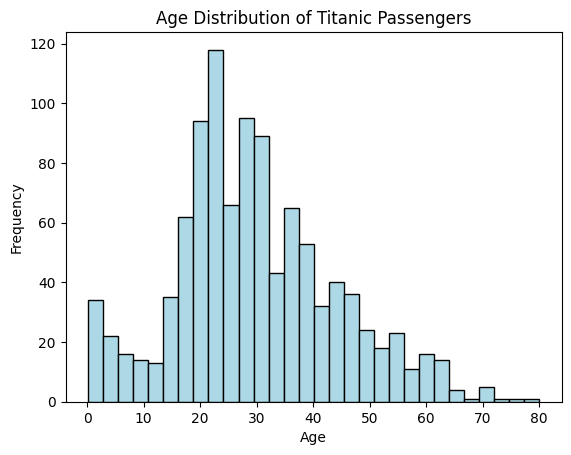

In [ ]:
# Histogram for age distribution
df['age'].plot(kind='hist', bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


5. Create a series of scatter plots to analyze various passenger characteristics. Generate the following plots:

a. A scatter plot showing the relationship between age and fare.








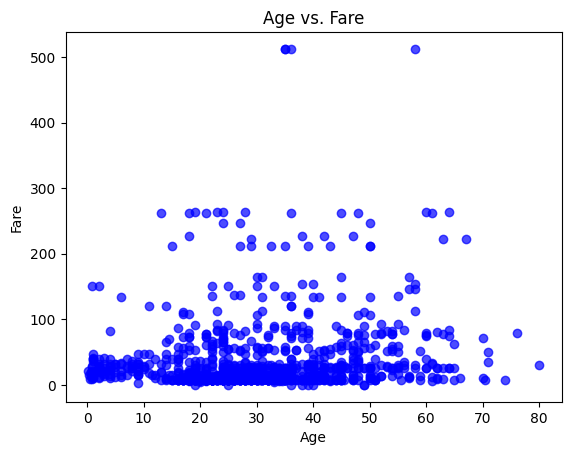

In [ ]:
# Scatter plot: Age vs. Fare
plt.scatter(df['age'], df['fare'], alpha=0.7, color='blue')
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


b. A scatter plot of age vs. fare, colored by gender (Sex) to explore how male and female passengers differ in fare and age.

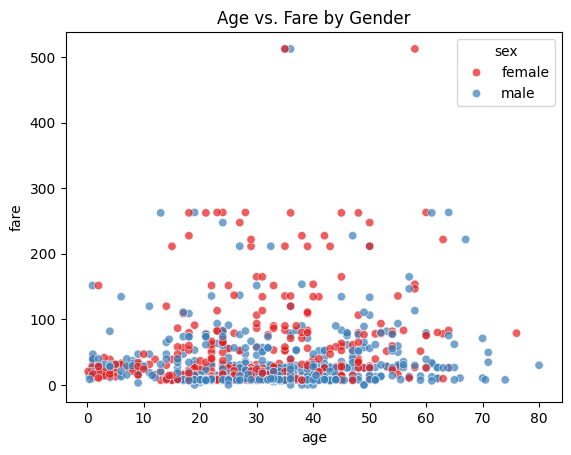

In [ ]:
# Scatter plot: Age vs. Fare colored by Gender
sns.scatterplot(data=df, x='age', y='fare', hue='sex', palette='Set1', alpha=0.7)
plt.title('Age vs. Fare by Gender')
plt.show()


c. A scatter plot of age vs. fare, where points are colored by passenger class (Pclass) to see how fare varies with different classes.

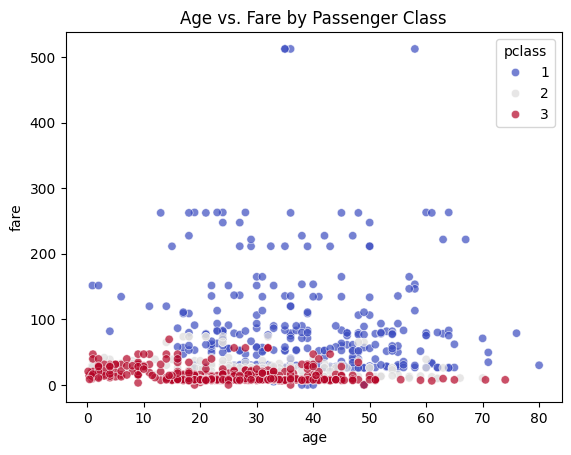

In [ ]:
# Scatter plot: Age vs. Fare colored by Passenger Class
sns.scatterplot(data=df, x='age', y='fare', hue='pclass', palette='coolwarm', alpha=0.7)
plt.title('Age vs. Fare by Passenger Class')
plt.show()


d. A scatter plot of age vs. fare, with both color and marker style differentiated by gender and class to provide a comprehensive overview of the data.


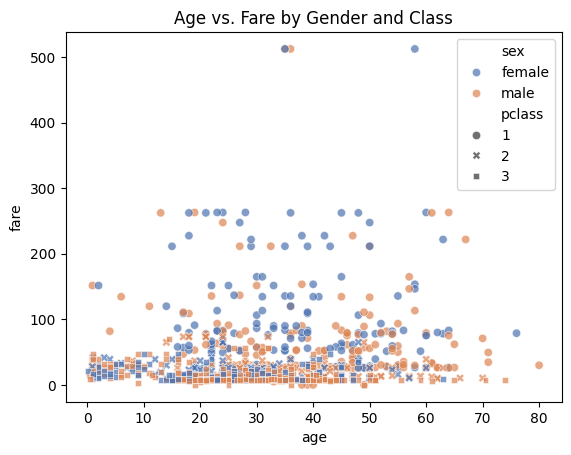

In [ ]:
# Scatter plot: Age vs. Fare by Gender and Class
sns.scatterplot(data=df, x='age', y='fare', hue='sex', style='pclass', palette='deep', alpha=0.7)
plt.title('Age vs. Fare by Gender and Class')
plt.show()


e. Create a combined figure that includes all four scatter plots for easy comparison."

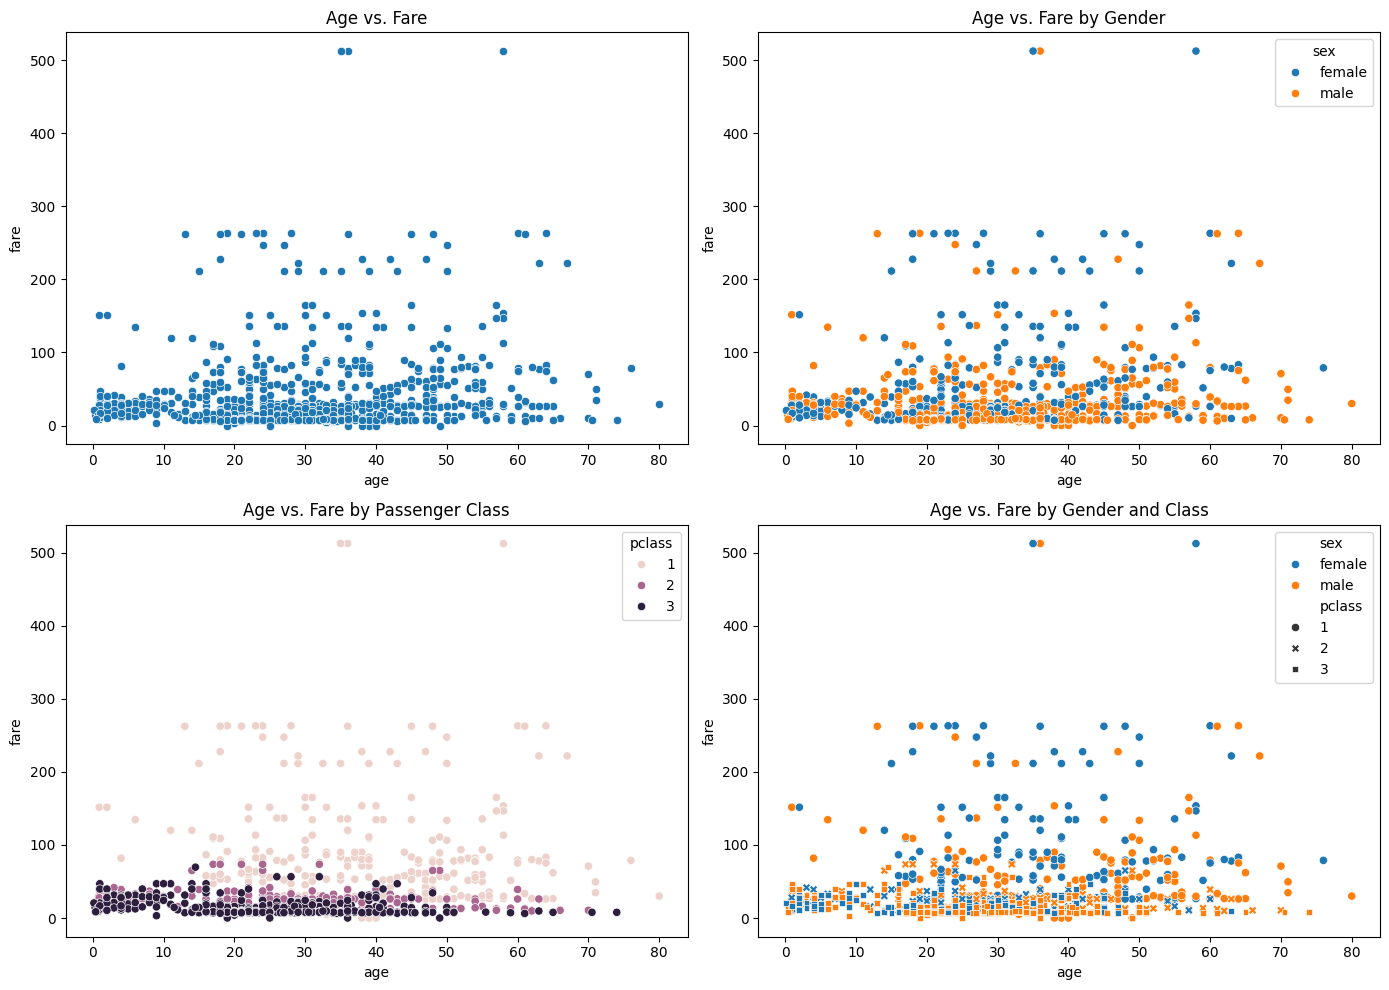

In [ ]:
# Combined figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='age', y='fare', ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Fare')

sns.scatterplot(data=df, x='age', y='fare', hue='sex', ax=axes[0, 1])
axes[0, 1].set_title('Age vs. Fare by Gender')

sns.scatterplot(data=df, x='age', y='fare', hue='pclass', ax=axes[1, 0])
axes[1, 0].set_title('Age vs. Fare by Passenger Class')

sns.scatterplot(data=df, x='age', y='fare', hue='sex', style='pclass', ax=axes[1, 1])
axes[1, 1].set_title('Age vs. Fare by Gender and Class')

plt.tight_layout()
plt.show()


6. Create a box plot that visualizes the distribution of passenger ages in the Titanic dataset. Ensure to include titles and labels for better clarity.



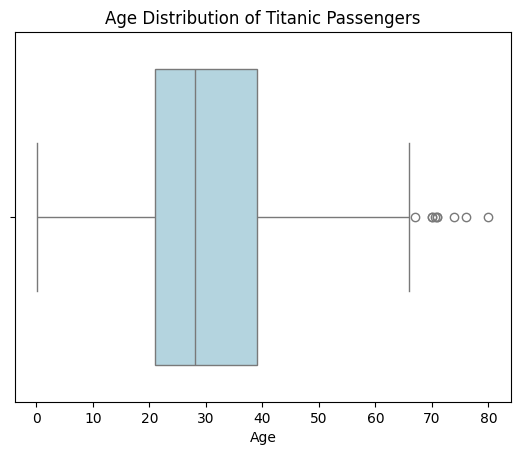

In [ ]:
# Box plot for age distribution
sns.boxplot(data=df, x='age', color='lightblue')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.show()


7. Modify the box plot you created to change the color of the boxes based on passenger gender. Write the code to achieve this, ensuring that the box colors represent male and female passengers differently.



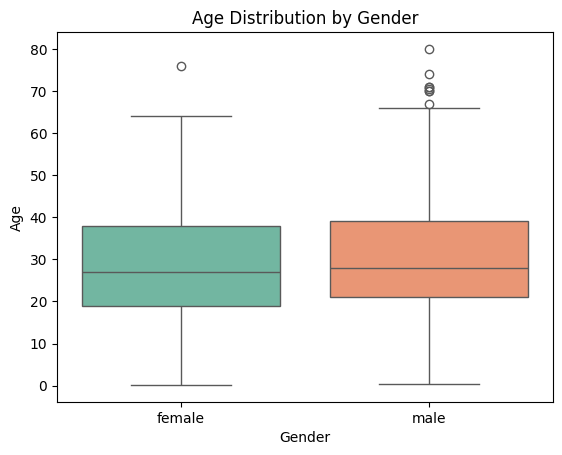

In [ ]:
# Box plot with gender-based color
sns.boxplot(data=df, x='sex', y='age', hue='sex', palette='Set2', dodge=False)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


8. Create side-by-side box plots that compare the ages of passengers across different ticket classes (1st, 2nd, 3rd). How can you interpret the differences in age distributions between the classes?



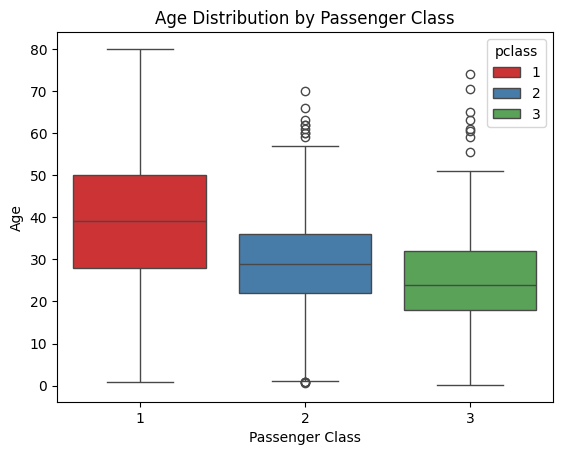

In [ ]:
# Side-by-side box plots for age across classes
sns.boxplot(data=df, x='pclass', y='age', hue='pclass', palette='Set1', dodge=False)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()



9. Create a line plot to visualize the trend of survival rates over different age groups.



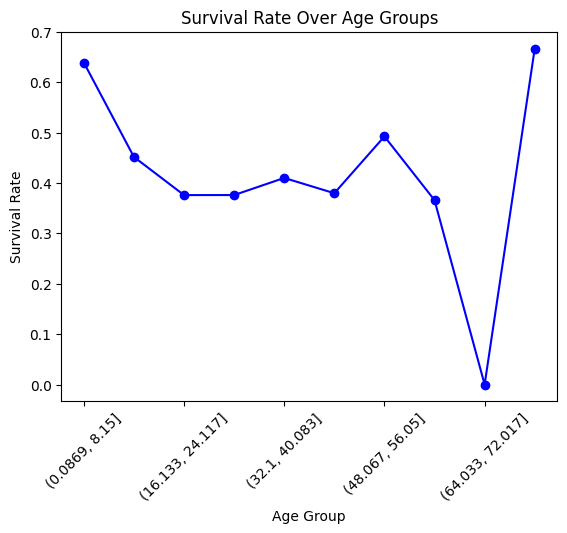

In [ ]:
# Line plot for survival rates by age groups
age_bins = pd.cut(df['age'], bins=10)
survival_rate_by_age = df.groupby(age_bins, observed=False)['survived'].mean()
survival_rate_by_age.plot(kind='line', marker='o', color='blue')

plt.title('Survival Rate Over Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()


10. Find the correlation between age and fare.



In [ ]:
# Correlation between age and fare
correlation_age_fare = df['age'].corr(df['fare'])
correlation_age_fare


0.17873932314646118

11. Create the correlation matrix of the entire dataset. Which are the features being highly correlated?



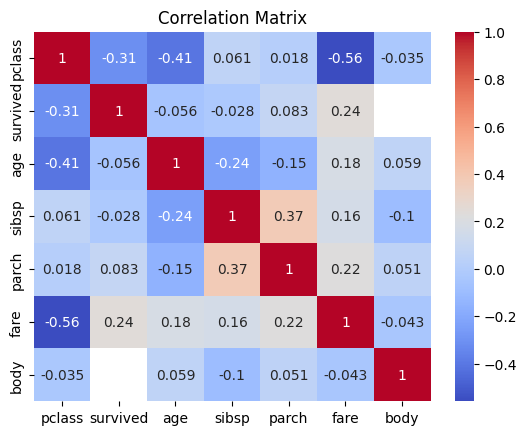

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


12. Find the outliers based on IQR method on age column of the Titanic dataset.



In [ ]:
# Outlier detection for age using IQR
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age

outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
outliers_age


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
285,1,0,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,NaN,96.0,"New York, NY"
506,2,0,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,NaN,NaN,"Guernsey / Montclair, NJ and/or Toledo, Ohio"
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,NaN,171.0,NaN
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN


13. Create a single figure containing multiple subplots: a box plot for age distribution, a histogram for age distribution, and a scatter plot for age vs. fare.



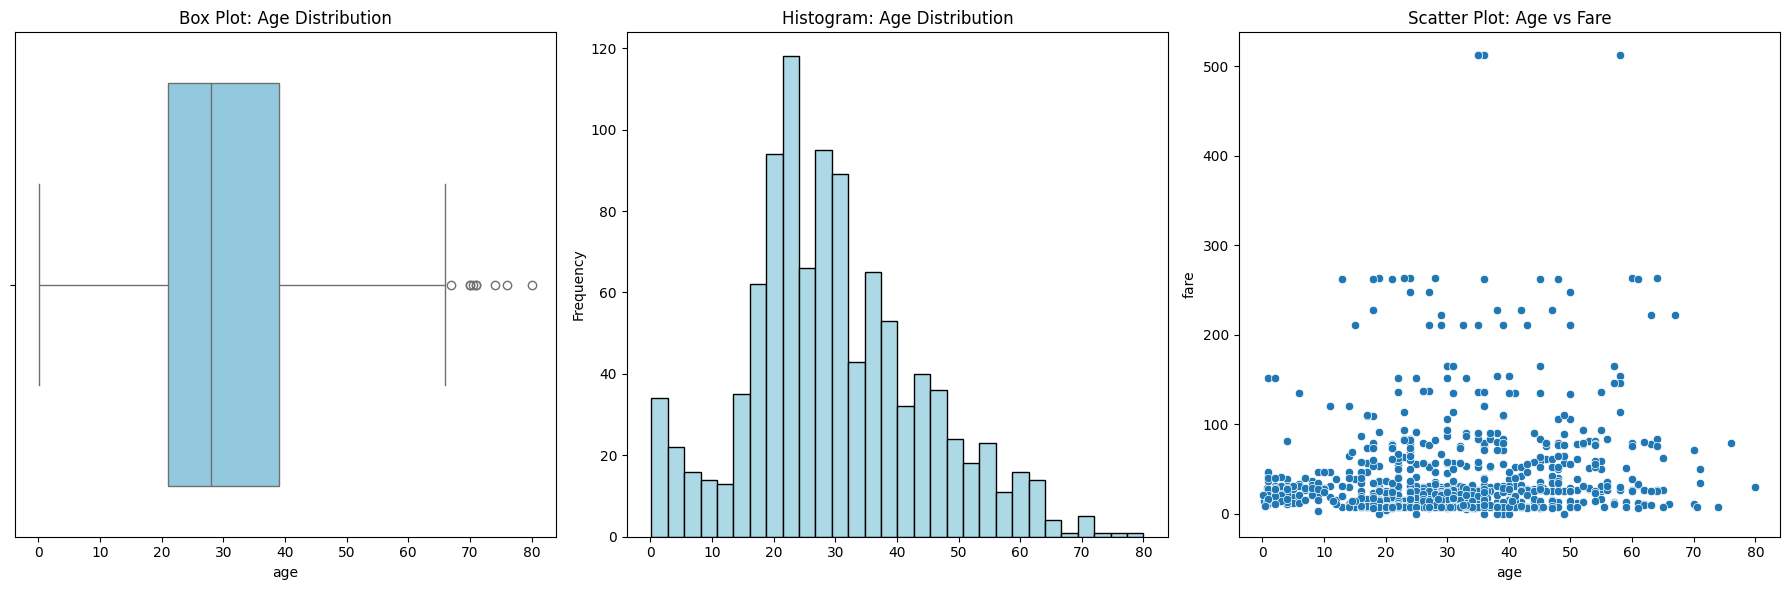

In [ ]:
# Combined figure with box plot, histogram, and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='age', ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot: Age Distribution')

df['age'].plot(kind='hist', bins=30, ax=axes[1], color='lightblue', edgecolor='black')
axes[1].set_title('Histogram: Age Distribution')

sns.scatterplot(data=df, x='age', y='fare', ax=axes[2])
axes[2].set_title('Scatter Plot: Age vs Fare')

plt.tight_layout()
plt.show()


14. Create a box plot that visualizes the distribution of fare in the Titanic dataset. Ensure to include titles and labels for better clarity.

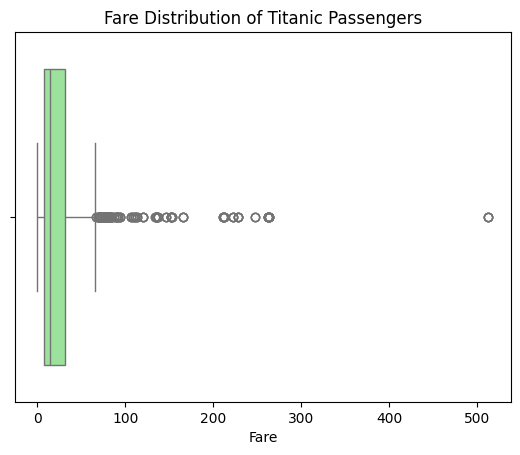

In [ ]:
# Box plot for fare distribution
sns.boxplot(data=df, x='fare', color='lightgreen')
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.show()


___
Exercise 3
---
___

1. Detect the outliers on the sepal_width of iris dataset using the LOF method



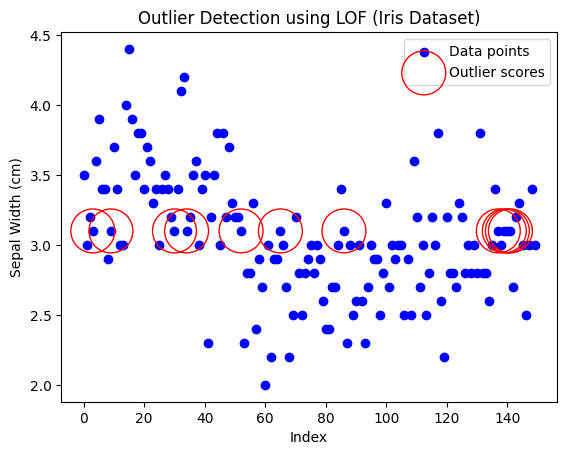

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Extract 'sepal_width' as a single feature
X = iris_df[['sepal width (cm)']].values

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = clf.fit_predict(X)
outlier_scores = clf.negative_outlier_factor_

# Ensure the dimensions match
radius = (outlier_scores.max() - outlier_scores) / (outlier_scores.max() - outlier_scores.min())

# Plot the results
plt.scatter(range(len(X)), X, label="Data points", color="blue")
plt.scatter(
    np.where(outlier_labels == -1)[0], X[outlier_labels == -1],
    edgecolors="r", facecolors="none", s=1000 * radius[outlier_labels == -1],
    label="Outlier scores"
)
plt.xlabel("Index")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.title("Outlier Detection using LOF (Iris Dataset)")
plt.show()


2. Detect the outliers on the age of titanic dataset using the LOF method.

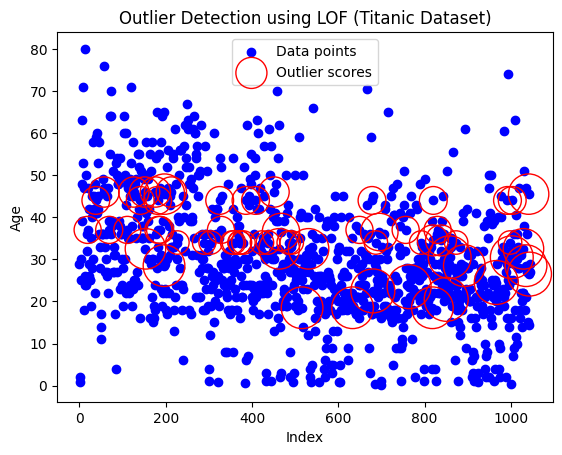

In [ ]:
# Ensure 'age' column is cleaned and without NaN
df = df[df['age'].notna()]

# Extract 'age' as a single feature
X = df[['age']].values

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = clf.fit_predict(X)
outlier_scores = clf.negative_outlier_factor_

# Ensure the dimensions match
radius = (outlier_scores.max() - outlier_scores) / (outlier_scores.max() - outlier_scores.min())

# Plot the results
plt.scatter(range(len(X)), X, label="Data points", color="blue")
plt.scatter(
    np.where(outlier_labels == -1)[0], X[outlier_labels == -1],
    edgecolors="r", facecolors="none", s=1000 * radius[outlier_labels == -1],
    label="Outlier scores"
)
plt.xlabel("Index")
plt.ylabel("Age")
plt.legend()
plt.title("Outlier Detection using LOF (Titanic Dataset)")
plt.show()
